In [348]:
import numpy as np
import pandas as pd 

"""
   The dataframe is created by importing the csv file
"""

df = pd.read_csv("spotifytoptracks.csv")

"""
   Data preparation for a better analysis:
   - Column "Unnamed: 0" is removed as giving no relevant info
   - All possible duplicate are dropped
   - FOR cycle is used to check if any null value

   COMMENT: possible code improvement could be to add a block to treat null/NaN values accordingy
"""

df = df.drop(columns="Unnamed: 0")

df = df.drop_duplicates()

for i in df.index:
    if df.loc[i].isnull() is True:
        print("Null value found")
    if df.loc[i].isna() is True:
        print("NaN value found")

print("No null or NaN value found")


No null or NaN value found


In [349]:
"""To check any outliers, it has been referred to the Kaggle description, where the followings features should be between 0 and 1:
   - speechiness 
   - liveness 
   - acousticness 
   - valence 
   - instrumentalness 
   - danceability 
   - energy 
   To identify the presence of any outliers, a FOR cycle is runned to control if the values of these feature are in the supposed range.
   If any outlier found, the user will be notified and the outlier replaced with the average value 0.5

   The tempo and duration_ms features have been supposed to have a value bigger than 0. 
   Similarly as before, a FOR cycle will be used to spot the outliers. If any, will be replace with the feature mean.
   
   The other numeric feature loudness has no fixed values, that may vary, reason why it has been taken as it is
   
   The outliers have not been considered to be for categorical features. Among these, the feature key is also representated by number, though, indicating a certain category,
   not any magnitude, it has not been considered for outliers

   COMMENT: a possible improvement could be undertanding how the numeric feature have been calculated, to prevent a proper substitution of outliers. 
   In particular it has been assumed that these ranges have a liner distribution, but if not, then a different value than mean should be used for replacement.
   The query Database creator would include clarification on some kind of categorical data, as key and track_ID, to better understand their meaning and structure
"""

for feature in ["speechiness","liveness","acousticness","valence","instrumentalness","instrumentalness","danceability","energy"]:
   for y in range(8):
      if df[feature][y] > 1:
         print("An outlier has been found")
         df[feature][y] = 0.5
      elif df[feature][y] < 0:
         print("An outlier has been found")
         df[feature][y] = 0.5

for feature in ["tempo","duration_ms"]:
   for y in range(8):
      if df[feature][y] < 0:
         print("An outlier has been found")
         df[feature][y] = df[feature].mean()
   


In [350]:
""" How many observations are there in this dataset? 
    The number of rows has been counted
"""

rows_number = df.shape[0]

print(f"The DataFrame has {rows_number} rows")

The DataFrame has 50 rows


In [351]:
""" How many features this dataset has?
    The number of columns has been counted 
"""

columns_number = len(df.columns)

print(f"The DataFrame has {columns_number} columns")


The DataFrame has 16 columns


In [352]:
"""Check the actual data types. 
   The object of the dataframe has been used to check each feature type
"""

df.dtypes   

artist               object
album                object
track_name           object
track_id             object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

In [353]:
"""Which of the features are categorical and which numeric? 
   It has been considered that python allows three types of numerical variables: int, float and complex.
   By looking for these in each feature type, it has been determined if it was numerical or not

   COMMENT: despite KEY has a numeric type, this represents a categorical data, that leads to a possibile improvement of the code: a better understanding of each feature
   and how it was retrieved would let a better handling and implementation
"""

for col in df.columns:
    if ("int" in str(df[col].dtype)):
        print(f"{col} is numeric type")
    elif ("float" in str(df[col].dtype)):
        print(f"{col} is numeric type")
    elif ("complex" in str(df[col].dtype)):
        print(f"{col} is numeric type")
    else:
        print(f"{col} is categorical type")

artist is categorical type
album is categorical type
track_name is categorical type
track_id is categorical type
energy is numeric type
danceability is numeric type
key is numeric type
loudness is numeric type
acousticness is numeric type
speechiness is numeric type
instrumentalness is numeric type
liveness is numeric type
valence is numeric type
tempo is numeric type
duration_ms is numeric type
genre is categorical type


In [354]:
"""Are there any artists that have more than 1 popular track? If yes, which and how many?
   It has been considered the descending order of artist according to the number of songs in the list"""
counter = 0
popular_artists = []

artist_list = df.groupby("artist").artist.count().sort_values(ascending=False)

for artist in artist_list:
    if artist > 1:
        counter += 1

print(f"An overall of {counter} artists have more than 1 song in the Spotify TOP 50")

print(artist_list[:(counter)])




An overall of 7 artists have more than 1 song in the Spotify TOP 50
artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Lewis Capaldi    2
Harry Styles     2
Post Malone      2
Justin Bieber    2
Name: artist, dtype: int64


In [355]:
"""Who was the most popular artist?""" 
"""The TOP 3 streamed artist are considered, and mean liveness is calculated. It is supposed that the more a song is likely to be played live, the more succesfull"""

"""calculate the highest number of presence, where the presence represents the number of time an artist appears in the chart"""

artist_presence = df.artist.value_counts()

""" max_presence variable represents the biggest number of songs an artist owns in the TOP 50 list"""

max_presence = int(artist_presence.max())   

top_artist = []
top_liveness = []

"""every artist mentioned in artist_presence list is considered if having a number of presence equal to the max_presence variable """
"""for each of the top artist, the mean of the liveness ratio is calculated to be compared to the maximum value"""

for i in range(len(artist_presence)):
    if artist_presence[i] == max_presence:
       formatted_liveness = "%.3f" % df.loc[df.artist == artist_presence.index[i]].liveness.mean()
       top_artist.append([artist_presence.index[i],formatted_liveness])

top_artist = pd.DataFrame(top_artist, columns=("Artist","Liveness_Mean"))

max_mean = top_artist["Liveness_Mean"].idxmax()

print(f"Top artist was {top_artist.loc[max_mean].Artist}, with a liveness mean of {top_artist.loc[max_mean].Liveness_Mean}")


Top artist was Dua Lipa, with a liveness mean of 0.182


C:\Users\pietr\AppData\Local\Temp\ipykernel_18676\1798992757.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if artist_presence[i] == max_presence:


In [356]:
"""How many artists in total have their songs in the top 50?"""

number_of_artists = len(df.artist.unique())

print(f"A total of {number_of_artists} artists are listed")

A total of 40 artists are listed


In [357]:
"""Are there any albums that have more than 1 popular track? If yes, which and how many?
   The same approach has been used as in the other task where a certain count of a value was requested, by using grouping method like groupby() or value_counts()
"""
counter = 0
popular_artists = []

album_list = df.album.value_counts()

for album in album_list:
    if  album > 1:
        counter += 1

print(f"An overall of {counter} albums are listed in the Spotify TOP 50")

print(album_list[:(counter)])



An overall of 4 albums are listed in the Spotify TOP 50
album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64


In [358]:
"""Which tracks have a danceability score above 0.7?
   The DataFram.loc has been used to filter out the tracks with the required score
"""

most_danceable = df.loc[df.danceability > 0.7].track_name

print("The tracks having a danceability bigger than 0.7 are:")

for song in most_danceable:
    print(song)

The tracks having a danceability bigger than 0.7 are:
Dance Monkey
The Box
Roses - Imanbek Remix
Don't Start Now
ROCKSTAR (feat. Roddy Ricch)
death bed (coffee for your head)
Falling
Tusa
Blueberry Faygo
Intentions (feat. Quavo)
Toosie Slide
Say So
Memories
Life Is Good (feat. Drake)
Savage Love (Laxed - Siren Beat)
Breaking Me
everything i wanted
Señorita
bad guy
WAP (feat. Megan Thee Stallion)
Sunday Best
Godzilla (feat. Juice WRLD)
Break My Heart
Dynamite
Supalonely (feat. Gus Dapperton)
Sunflower - Spider-Man: Into the Spider-Verse
Hawái
Ride It
goosebumps
RITMO (Bad Boys For Life)
THE SCOTTS
SICKO MODE


In [359]:
"""Which tracks have a danceability score below 0.4?
   The DataFram.loc has been used to filter out the tracks with the required score
"""

least_danceable = df.loc[df.danceability < 0.4].track_name

print("The tracks having a danceability lower than 0.4 are:")

for song in least_danceable:
    print(song)

The tracks having a danceability lower than 0.4 are:
lovely (with Khalid)


In [360]:
"""Which tracks have their loudness above -5?
   The DataFram.loc has been used to filter out the tracks with the required score
"""

loudest_song = df.loc[df.loudness > -5].track_name

print("The tracks having loudness bigger than -5 are:")

for song in loudest_song:
    print(song)

The tracks having loudness bigger than -5 are:
Don't Start Now
Watermelon Sugar
Tusa
Circles
Before You Go
Say So
Adore You
Mood (feat. iann dior)
Break My Heart
Dynamite
Supalonely (feat. Gus Dapperton)
Rain On Me (with Ariana Grande)
Sunflower - Spider-Man: Into the Spider-Verse
Hawái
Ride It
goosebumps
Safaera
Physical
SICKO MODE


In [361]:
"""Which tracks have their loudness below -8?
   The DataFram.loc has been used to filter out the tracks with the required score
"""

least_loud_song = df.loc[df.loudness < -8].track_name

print("The tracks having loudness smaller than -8 are:")

for song in least_loud_song:
    print(song)



The tracks having loudness smaller than -8 are:
death bed (coffee for your head)
Falling
Toosie Slide
Savage Love (Laxed - Siren Beat)
everything i wanted
bad guy
HIGHEST IN THE ROOM
lovely (with Khalid)
If the World Was Ending - feat. Julia Michaels


In [362]:
"""Which track is the longest?
   The idxmax() has been used to determine the index of the biggest value for duration_ms
"""

longest_time = df.duration_ms.idxmax()

longest_song = df.loc[longest_time]

print(f"The longest song is {longest_song.track_name}")

The longest song is SICKO MODE


In [363]:
"""Which track is the shortest?
   Same approach than previous task but with idxmin()
"""

shortest_time = df.duration_ms.idxmin()

shortest_song = df.loc[shortest_time]

print(f"The shortest song is {shortest_song.track_name}")


The shortest song is Mood (feat. iann dior)


In [364]:
"""Which genre is the most popular?"""

most_pop_genre = df.genre.value_counts()

print(f"Most popular genre is {most_pop_genre.idxmax()} with {most_pop_genre.loc[most_pop_genre.idxmax()]} songs")

Most popular genre is Pop with 14 songs


In [365]:
"""Which genres have just one song on the top 50?"""

counter = 0

genre_list = df.genre.value_counts()

for genre in genre_list:
    if  genre == 1:
        counter += 1

print(f"An overall of {counter} general are listed once in the Spotify TOP 50")

print(genre_list[(counter):])



An overall of 10 general are listed once in the Spotify TOP 50
genre
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


In [366]:
"""How many genres in total are represented in the top 50?"""

genre_number = len(df.genre.unique())

print(f"Spotify TOP 50 has in total {genre_number} genre inside")

Spotify TOP 50 has in total 16 genre inside


<Axes: >

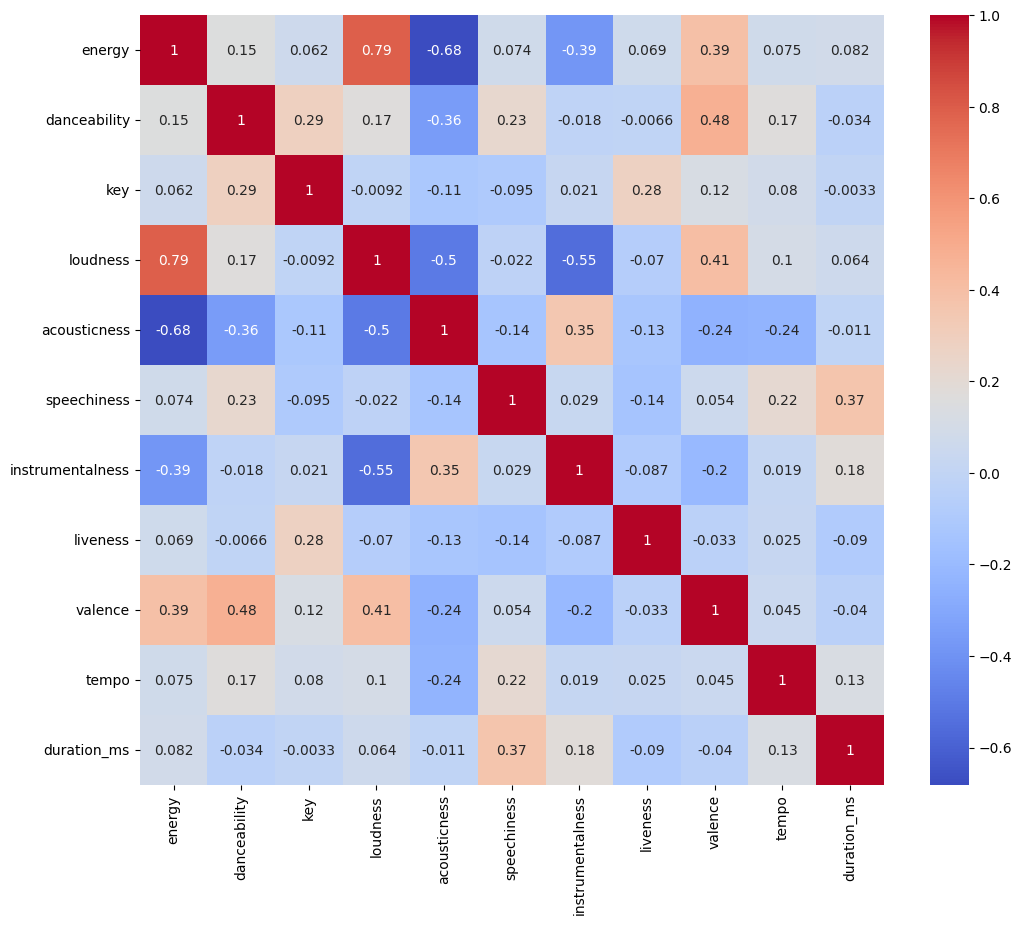

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt 

""" Which features are strongly positively correlated? """
""" Which features are strongly negatively correlated? """
""" Which features are not correlated? """

""" A correlation matrix has been created to see the correlation between features mapped with colours:
    - red colours means two features are positively correlated, this is also represented by a positive value
    - blue colour means two features are negatively correlated, rappresented by a negative value
    - white colours means the correlation is almost null, hence the features are not connected or may be non-linearly correlated

    From the matrix, loudeness and energy are the most correlated features, meanwhile energy and acoustiness the least. Danceability and liveness almost not correlated, slightly negatively
"""

corr = df.drop(columns=["artist","album","track_name","track_id","genre"]).corr()

corr

plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True, cmap="coolwarm")


In [368]:
"""How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?"""

"""How to comapre ? we can consider the mean of the danceability of each genre, and make a comparison in relation to the data description in Kaggle
 Higher value means that it is easier to dance to the song."""

danceability_mean = df.groupby("genre").danceability.mean()

for gnr in ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]:
    formatted_danceability = "%.3f" % danceability_mean.loc[gnr]
    print(f"{gnr} has a danceability of {formatted_danceability}")


Pop has a danceability of 0.678
Hip-Hop/Rap has a danceability of 0.766
Dance/Electronic has a danceability of 0.755
Alternative/Indie has a danceability of 0.662


In [369]:
"""How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?"""
"""This value describes how acoustic a song is."""

acousticness_mean = df.groupby("genre").acousticness.mean()

for gnr in ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]:
    formatted_acousticness = "%.3f" % acousticness_mean.loc[gnr]
    print(f"{gnr} has a acousticness of {formatted_acousticness}")



Pop has a acousticness of 0.324
Hip-Hop/Rap has a acousticness of 0.189
Dance/Electronic has a acousticness of 0.099
Alternative/Indie has a acousticness of 0.584


In [370]:
"""How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?"""
"""Higher value means that the song is louder."""

loudness_mean = df.groupby("genre").loudness.mean()

for gnr in ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]:
    formatted_loudness = "%.3f" % loudness_mean.loc[gnr]
    print(f"{gnr} has a loudness of {formatted_loudness}")

Pop has a loudness of -6.460
Hip-Hop/Rap has a loudness of -6.918
Dance/Electronic has a loudness of -5.338
Alternative/Indie has a loudness of -5.421
